In [122]:
from pyspark.sql import SparkSession

In [123]:
spark=SparkSession.builder.appName("datacamp tutorial").getOrCreate()

In [124]:
spark

In [125]:
df = spark.read.csv('Online_Retail.csv',header=True)

In [126]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate   |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+--------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |1/12/2010 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |1/12/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |1/12/2010 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |1/12/2010 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |1/12/2010 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------

In [127]:
df.head()

Row(InvoiceNo='536365', StockCode='85123A', Description='WHITE HANGING HEART T-LIGHT HOLDER', Quantity='6', InvoiceDate='1/12/2010 8:26', UnitPrice='2.55', CustomerID='17850', Country='United Kingdom')

In [128]:
df.count()

541909

In [129]:
df.tail(5)

[Row(InvoiceNo='581587', StockCode='22613', Description='PACK OF 20 SPACEBOY NAPKINS', Quantity='12', InvoiceDate='9/12/2011 12:50', UnitPrice='0.85', CustomerID='12680', Country='France'),
 Row(InvoiceNo='581587', StockCode='22899', Description="CHILDREN'S APRON DOLLY GIRL ", Quantity='6', InvoiceDate='9/12/2011 12:50', UnitPrice='2.1', CustomerID='12680', Country='France'),
 Row(InvoiceNo='581587', StockCode='23254', Description='CHILDRENS CUTLERY DOLLY GIRL ', Quantity='4', InvoiceDate='9/12/2011 12:50', UnitPrice='4.15', CustomerID='12680', Country='France'),
 Row(InvoiceNo='581587', StockCode='23255', Description='CHILDRENS CUTLERY CIRCUS PARADE', Quantity='4', InvoiceDate='9/12/2011 12:50', UnitPrice='4.15', CustomerID='12680', Country='France'),
 Row(InvoiceNo='581587', StockCode='22138', Description='BAKING SET 9 PIECE RETROSPOT ', Quantity='3', InvoiceDate='9/12/2011 12:50', UnitPrice='4.95', CustomerID='12680', Country='France')]

In [130]:
df.select("CustomerID").distinct().count()

4373

In [131]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [132]:
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+---------------+-------------+
|        Country|country_count|
+---------------+-------------+
| United Kingdom|         3950|
|        Germany|           95|
|         France|           87|
|          Spain|           31|
|        Belgium|           25|
|    Switzerland|           21|
|       Portugal|           19|
|          Italy|           15|
|        Finland|           12|
|        Austria|           11|
|         Norway|           10|
|        Denmark|            9|
|Channel Islands|            9|
|      Australia|            9|
|    Netherlands|            9|
|         Sweden|            8|
|         Cyprus|            8|
|          Japan|            8|
|         Poland|            6|
|         Greece|            4|
+---------------+-------------+
only showing top 20 rows



In [133]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

DataFrame[key: string, value: string]

In [134]:
spark

In [135]:
df = df.withColumn('date',to_timestamp("InvoiceDate", 'dd/MM/yy hh:mm'))
df.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2010 8:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2010 8:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|
+---------+-----

In [136]:
df.select(min("date")).show(5)

+-------------------+
|          min(date)|
+-------------------+
|2010-12-01 00:03:00|
+-------------------+



In [137]:
df.select(max('date')).show()

+-------------------+
|          max(date)|
+-------------------+
|2011-12-09 11:59:00|
+-------------------+



In [138]:
df = df.withColumn("from_date", lit("12/1/10 08:26"))
df = df.withColumn('from_date',to_timestamp("from_date", 'yy/MM/dd HH:mm'))

df2=df.withColumn('from_date',to_timestamp(col('from_date'))).withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))

In [139]:
df2.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+---------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|  recency|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+---------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2010 8:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2012-01-10 08:26:00|-34992000|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2012-01-10 08:26:00|-34992000|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2010 8:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2012-01-10 08:26:00|-34992000|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2010 8:26|     3.39|     1

In [140]:
df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')),on='recency',how='leftsemi')

In [141]:
df2.show()

+---------+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+
|  recency|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|
+---------+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+
|-34986780|   536384|    82484|WOOD BLACK BOARD ...|       3|1/12/2010 9:53|     6.45|     18074|United Kingdom|2010-12-01 09:53:00|2012-01-10 08:26:00|
|-34986780|   536384|    84755|COLOUR GLASS T-LI...|      48|1/12/2010 9:53|     0.65|     18074|United Kingdom|2010-12-01 09:53:00|2012-01-10 08:26:00|
|-34986780|   536384|    22464|HANGING METAL HEA...|      12|1/12/2010 9:53|     1.65|     18074|United Kingdom|2010-12-01 09:53:00|2012-01-10 08:26:00|
|-34986780|   536384|    21324|HANGING MEDINA LA...|       6|1/12/2010 9:53|     2

In [142]:
df2.printSchema()

root
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)



In [143]:
df_freq = df2.groupBy("CustomerID").agg(count("InvoiceDate").alias("frequency"))

In [144]:
df_freq.show()

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|     16250|       14|
|     17714|       10|
|     17128|       14|
|     14439|       32|
|     17917|       29|
|     18106|       39|
|     17855|       17|
|     12386|        2|
|     13672|        3|
|     15107|        1|
|     15100|        1|
|     13126|       31|
|     15899|        4|
|     18113|        1|
|     16081|       22|
|     13144|        3|
|     14295|        2|
|     12967|       15|
|     14090|        1|
|     17311|       24|
+----------+---------+
only showing top 20 rows



In [145]:
df3 = df2.join(df_freq,on='CustomerID',how='inner')

In [146]:
df3.show()

+----------+---------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+---------+
|CustomerID|  recency|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|frequency|
+----------+---------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+---------+
|     18074|-34986780|   536384|    82484|WOOD BLACK BOARD ...|       3|1/12/2010 9:53|     6.45|United Kingdom|2010-12-01 09:53:00|2012-01-10 08:26:00|       13|
|     18074|-34986780|   536384|    84755|COLOUR GLASS T-LI...|      48|1/12/2010 9:53|     0.65|United Kingdom|2010-12-01 09:53:00|2012-01-10 08:26:00|       13|
|     18074|-34986780|   536384|    22464|HANGING METAL HEA...|      12|1/12/2010 9:53|     1.65|United Kingdom|2010-12-01 09:53:00|2012-01-10 08:26:00|       13|
|     18074|-34986780|

In [147]:
df3.count()

61881

In [148]:
df3.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)



In [149]:
m_val=df3.withColumn('TotalAmount',col("Quantity")*col("UnitPrice"))

In [150]:
m_val.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)
 |-- TotalAmount: double (nullable = true)



In [151]:
mval = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))

In [152]:
mval.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- monetary_value: double (nullable = true)



In [153]:
mval.show()

+----------+------------------+
|CustomerID|    monetary_value|
+----------+------------------+
|     16250|            226.14|
|     17714|             153.0|
|     17128|            157.09|
|     14439|           2661.24|
|     17917|110.91000000000001|
|     18106| 430.6999999999999|
|     17855|208.96999999999997|
|     12386|             143.0|
|     13672|            -62.13|
|     15107|               8.5|
|     15100|             175.2|
|     13126|            346.04|
|     15899|             56.25|
|     18113| 76.32000000000001|
|     16081|157.60000000000002|
|     13144|110.94999999999999|
|     14295|             -11.5|
|     12967|            1368.4|
|     14090| 76.32000000000001|
|     17311|            556.46|
+----------+------------------+
only showing top 20 rows



In [154]:
finaldf = mval.join(df3,on='CustomerID',how='inner')

In [155]:
finaldf.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- monetary_value: double (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)



In [156]:
finaldf = finaldf.select(['recency','frequency','monetary_value','CustomerID']).distinct()

In [157]:
finaldf.show()

+---------+---------+------------------+----------+
|  recency|frequency|    monetary_value|CustomerID|
+---------+---------+------------------+----------+
|-34986420|       14|            226.14|     16250|
|-30405240|       10|             153.0|     17714|
|-31652640|       14|            157.09|     17128|
|-30314820|       32|           2661.24|     14439|
|-34071480|       29|110.91000000000001|     17917|
|-31219380|       39| 430.6999999999999|     18106|
|-34900920|       17|208.96999999999997|     17855|
|-31909740|        2|             143.0|     12386|
|-31566240|        3|            -62.13|     13672|
|-31479660|        1|               8.5|     15107|
|-31528260|        1|             175.2|     15100|
|-31438020|       31|            346.04|     13126|
|-34552200|        4|             56.25|     15899|
|-34588500|        1| 76.32000000000001|     18113|
|-34377000|       22|157.60000000000002|     16081|
|-31439460|        3|110.94999999999999|     13144|
|-31437180| 

In [158]:
finaldf.describe().show()

+-------+-----------------+------------------+-----------------+-----------------+
|summary|          recency|         frequency|   monetary_value|       CustomerID|
+-------+-----------------+------------------+-----------------+-----------------+
|  count|             3528|              3528|             3528|             3528|
|   mean|    -1.20769225E7|21.908730158730158|354.4305073696148|15250.70634920635|
| stddev|9086387.447225008|29.543155187974833| 3234.84594948651|1716.514101638012|
|    min|        -35022180|                 1|        -168469.6|            12346|
|    max|         -2752020|               392|         10896.18|            18287|
+-------+-----------------+------------------+-----------------+-----------------+



In [159]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

In [160]:
assemble = VectorAssembler(
    inputCols=['recency','frequency','monetary_value'],
    outputCol='features'
)

In [161]:
assemble

VectorAssembler_18a67e16d390

In [162]:
assembled_data = assemble.transform(finaldf)

In [163]:
assembled_data.show()

+---------+---------+------------------+----------+--------------------+
|  recency|frequency|    monetary_value|CustomerID|            features|
+---------+---------+------------------+----------+--------------------+
|-34986420|       14|            226.14|     16250|[-3.498642E7,14.0...|
|-30405240|       10|             153.0|     17714|[-3.040524E7,10.0...|
|-31652640|       14|            157.09|     17128|[-3.165264E7,14.0...|
|-30314820|       32|           2661.24|     14439|[-3.031482E7,32.0...|
|-34071480|       29|110.91000000000001|     17917|[-3.407148E7,29.0...|
|-31219380|       39| 430.6999999999999|     18106|[-3.121938E7,39.0...|
|-34900920|       17|208.96999999999997|     17855|[-3.490092E7,17.0...|
|-31909740|        2|             143.0|     12386|[-3.190974E7,2.0,...|
|-31566240|        3|            -62.13|     13672|[-3.156624E7,3.0,...|
|-31479660|        1|               8.5|     15107|[-3.147966E7,1.0,...|
|-31528260|        1|             175.2|     15100|

In [164]:
scale = StandardScaler(inputCol='features',outputCol='standardized')

In [165]:
data_scale = scale.fit(assembled_data)

In [166]:
data_scale_output = data_scale.transform(assembled_data)

In [167]:
data_scale_output.select('standardized').show(2,truncate=False)

+------------------------------------------------------------+
|standardized                                                |
+------------------------------------------------------------+
|[-3.850421325659505,0.47388303351222694,0.06990750209786561]|
|[-3.346240755921738,0.33848788108016215,0.0472974609576963] |
+------------------------------------------------------------+
only showing top 2 rows



In [168]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

In [169]:
cost=np.zeros(10)

In [170]:
evalator = ClusteringEvaluator(predictionCol='prediction',featuresCol='standardized',
                               metricName='silhouette',distanceMeasure='squaredEuclidean')


In [171]:
for i in range(2,10):
    KMeans_algo = KMeans(featuresCol='standardized',k=i)
    KMeans_fit = KMeans_algo.fit(data_scale_output)
    ouput = KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

In [172]:
cost

array([   0.        ,    0.        , 8636.0565931 , 5912.70900149,
       3334.00952471, 2759.93159885, 1955.96409594, 1568.7953526 ,
       1906.64000851, 1603.23474711])

In [173]:
import pylab as pl

In [174]:
import pandas as pd

In [175]:
df_cost = pd.DataFrame(cost[2:])
df_cost.columns=['cost']
new_col = range(2,10)
df_cost.insert(0,'Cluster',new_col)

In [176]:
df_cost

,Cluster,cost
0,2,8636.056593
1,3,5912.709001
2,4,3334.009525
3,5,2759.931599
4,6,1955.964096
5,7,1568.795353
6,8,1906.640009
7,9,1603.234747


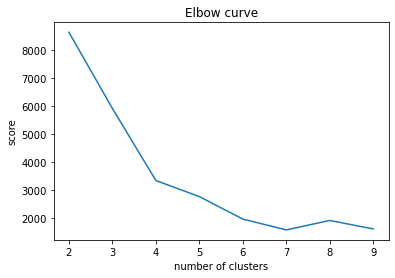

In [177]:
pl.plot(df_cost.Cluster,df_cost.cost)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('Elbow curve')
pl.show()

In [178]:
KMeans_algo = KMeans(featuresCol='standardized',k=4)
KMeans_fit  = KMeans_algo.fit(data_scale_output)

In [179]:
preds = KMeans_fit.transform(data_scale_output)

In [180]:
preds.show()

+---------+---------+------------------+----------+--------------------+--------------------+----------+
|  recency|frequency|    monetary_value|CustomerID|            features|        standardized|prediction|
+---------+---------+------------------+----------+--------------------+--------------------+----------+
|-34986420|       14|            226.14|     16250|[-3.498642E7,14.0...|[-3.8504213256595...|         1|
|-30405240|       10|             153.0|     17714|[-3.040524E7,10.0...|[-3.3462407559217...|         1|
|-31652640|       14|            157.09|     17128|[-3.165264E7,14.0...|[-3.4835230374934...|         1|
|-30314820|       32|           2661.24|     14439|[-3.031482E7,32.0...|[-3.3362896064109...|         1|
|-34071480|       29|110.91000000000001|     17917|[-3.407148E7,29.0...|[-3.7497278426538...|         1|
|-31219380|       39| 430.6999999999999|     18106|[-3.121938E7,39.0...|[-3.4358407212246...|         1|
|-34900920|       17|208.96999999999997|     17855|[-3.

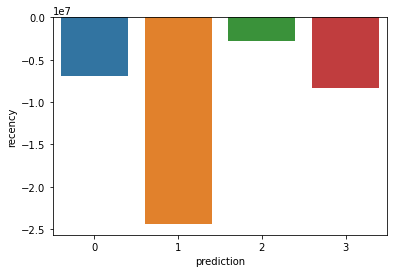

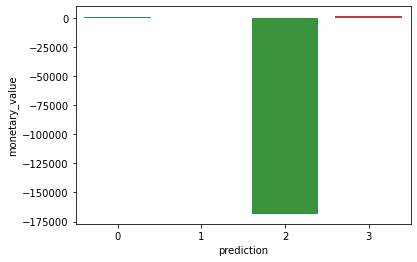

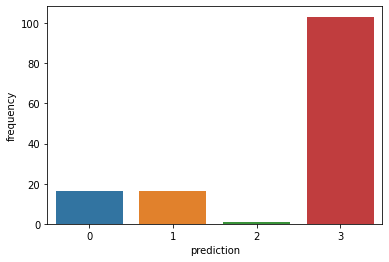

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
df_viz = preds.select(['recency','monetary_value','frequency','prediction'])
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'],as_index=False).mean()
list1 = ['recency','monetary_value','frequency']
for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()